<a href="https://colab.research.google.com/github/seungmei/ESAA_24_1/blob/main/0308(%EA%B8%88)_%EC%84%B8%EC%85%98_%EC%97%B0%EC%8A%B5%EB%AC%B8%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **| 분류 연습 문제**
___
출처 : 핸즈온 머신러닝 Ch03 분류 연습문제 1, 2번

In [1]:
# import data
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version = 1, as_frame = False)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [2]:
X, y = mnist["data"], mnist["target"]

In [3]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

### **1. MNIST 데이터셋으로 분류기를 만들어 테스트 세트에서 97% 정확도를 달성해보세요.**
___

1. `KNeghtborsClassifier`를 사용하는 것을 추천합니다.
2. `weights`와 `n_neighbors` 하이퍼 파라미터로 그리드 탐색을 시도하여, 좋은 하이퍼 파라미터 값을 찾아보세요.

In [4]:
# import package
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [7]:
# Try GridSearch to optimize hyperparameter
grid_params = {'n_neighbors' : [2,3],
    'weights' : ["uniform", "distance"]}

knn_clf = KNeighborsClassifier()
grid_search = GridSearchCV(knn_clf, grid_params, cv=2, verbose=3)
grid_search.fit(X_train, y_train)

Fitting 2 folds for each of 4 candidates, totalling 8 fits
[CV 1/2] END ....n_neighbors=2, weights=uniform;, score=0.956 total time= 1.1min
[CV 2/2] END ....n_neighbors=2, weights=uniform;, score=0.958 total time= 1.0min
[CV 1/2] END ...n_neighbors=2, weights=distance;, score=0.964 total time=  54.8s
[CV 2/2] END ...n_neighbors=2, weights=distance;, score=0.964 total time=  55.6s
[CV 1/2] END ....n_neighbors=3, weights=uniform;, score=0.966 total time=  55.8s
[CV 2/2] END ....n_neighbors=3, weights=uniform;, score=0.965 total time=  55.5s
[CV 1/2] END ...n_neighbors=3, weights=distance;, score=0.967 total time= 1.0min
[CV 2/2] END ...n_neighbors=3, weights=distance;, score=0.966 total time= 1.1min


GridSearchCV(cv=2, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [2, 3],
                         'weights': ['uniform', 'distance']},
             verbose=3)

In [8]:
# best hyperparameter
print("Best Parameters : ", grid_search.best_params_)

Best Parameters :  {'n_neighbors': 3, 'weights': 'distance'}


In [9]:
# best score
print("Best Score : ", grid_search.best_score_)

Best Score :  0.96625


In [10]:
# model test
print("Best Test Score : ", grid_search.score(X_test, y_test))

Best Test Score :  0.9717


### **2. 다음 단계를 따라 인위적으로 훈련 세트를 늘리는 데이터 증식 또는 훈련 세트 확장 기법을 연습해봅시다.**
___

#### **STEP 1. MNIST 이미지를 (왼, 오른, 위, 아래) 어느 방향으로든 한 픽셀 이동시킬 수 있는 함수를 만들어 보세요.**

In [11]:
from scipy.ndimage.interpolation import shift

<ipython-input-11-c50379b1544a>:1: DeprecationWarning: Please use `shift` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  from scipy.ndimage.interpolation import shift


In [29]:
import matplotlib.pyplot as plt

In [30]:
#이미지를 reshape 해서 이미지를  dx, dy 만큼 변환한 뒤 원래 형태로 반환하는 함수
def shift_image(image, dx, dy):
  image = image.reshape((28,28))
  shifted_image = shift(image, [dx, dy], cval = 0)
  return shifted_image.reshape([-1])

In [31]:
#함수가 잘 작동 하는지 확인하기 위해 이미지를 변형 후 확인해본다.
image = X_train[1000]
shifted_image_right = shift_image(image, 0, 5)
shifted_image_up = shift_image(image, -5, 0)

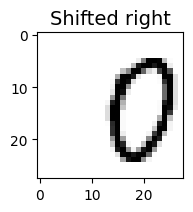

In [32]:
plt.subplot(132)
plt.title("Shifted right", fontsize=14)
plt.imshow(shifted_image_right.reshape(28, 28), interpolation="nearest", cmap="Greys")

In [21]:
#from PIL import Image
#import numpy as np

#def shifter(image, y, y_):
#    # 이미지의 각 행을 y 픽셀만큼 이동
#    return np.array([np.roll(row, y) for row in image])

#def pad_vector(vector, how, depth):
#    # 이미지의 좌우에 depth만큼의 픽셀을 추가
#    if how == 'left':
#        return np.pad(vector, ((depth, 0), (0, 0)), mode='constant', constant_values=0)
#    elif how == 'right':
#        return np.pad(vector, ((0, depth), (0, 0)), mode='constant', constant_values=0)

#def shift_image(image_src, at):
#    x, y = at
#    x_, y_ = abs(x), abs(y)

#    if (x > 0):
#        left_pad = pad_vector(vector=image_src, how='left', depth=x_)
#        image_trans = shifter(image=left_pad, y=y, y_=y_)
#    elif (x < 0):
#        right_pad = pad_vector(vector=image_src, how='right', depth=x_)
#        image_trans = shifter(image=right_pad, y=y, y_=y_)
#    else:
#        image_trans = shifter(image=image_src, y=y, y_=y_)

#    return image_trans

####  **STEP 2. 앞에서 만든 함수를 이용하여, 훈련 세트에 있는 각 이미지에 대해 네 개의 이동된 복사본(방향마다 한 개씩)을 만들어 훈련 세트에 추가하세요**

####  **STEP 3. 위에서 확장한 데이터셋을 이용하여, 1번 문제에서 찾은 최적 모델을 훈련시키고, 테스트 세트에서 정확도를 측정해보세요**

In [33]:
#테스트 세트를 새로운 expanded 변수에 복사
X_train_expanded = [image for image in X_train]
y_train_expanded = [label for label in y_train]

In [34]:
# for문 사용하여 이미지들을 이동 후 expanded 에 덧붙여준다. 타겟은 변형할 필요 X
for dx, dy in ((0,1), (0,-1), (-1,0), (1,0)):
  for image, label in zip(X_train, y_train):
    X_train_expanded.append(shift_image(image, dx, dy))
    y_train_expanded.append(label)

In [35]:
#최적의 파라미터 값 확인
grid_search.best_params_

#테스트 세트에서의 최고 성적은 대략 97% 의 정확도.
grid_search.best_score_

0.96625

In [36]:
from sklearn.metrics import accuracy_score
y_pred = grid_search.predict(X_test)
accuracy_score(y_test, y_pred)

0.9717

In [23]:
# MNIST 데이터셋에서 이미지 로드
#index = 0  # 원하는 이미지의 인덱스 선택
#original_image_data = X_train[index]

# 이미지를 각 방향으로 한 픽셀씩 이동시키기
#shifted_left = shift_image(original_image_data, at=(-1, 0))
#shifted_right = shift_image(original_image_data, at=(1, 0))
#shifted_up = shift_image(original_image_data, at=(0, -1))
#shifted_down = shift_image(original_image_data, at=(0, 1))

# 이동한 이미지를 객체로 만들어서 반환
#class ShiftedObject:
#    def __init__(self, image_data, direction):
#        self.image = Image.fromarray(image_data)
#        self.direction = direction

#shifted_left_obj = ShiftedObject(shifted_left, 'left')
#shifted_right_obj = ShiftedObject(shifted_right, 'right')
#shifted_up_obj = ShiftedObject(shifted_up, 'up')
#shifted_down_obj = ShiftedObject(shifted_down, 'down')

# 예시: 이동한 이미지를 확인
#shifted_left_obj.image.show()
#shifted_right_obj.image.show()
#shifted_up_obj.image.show()
#shifted_down_obj.image.show()


ValueError: operands could not be broadcast together with remapped shapes [original->remapped]: (2,2)  and requested shape (1,2)